# Nivell 1:
## Exercici 1:
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv( "DelayedFlights.csv", index_col=[0])
df

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


    + Una variable categòrica (UniqueCarrier)

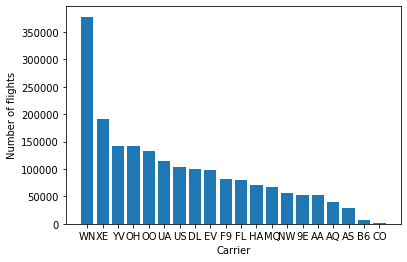

In [47]:
x_values = df['UniqueCarrier'].unique()
y_values = df['UniqueCarrier'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.xlabel("Carrier")
plt.ylabel("Number of flights")
plt.show()

    + Una variable numèrica (ArrDelay)

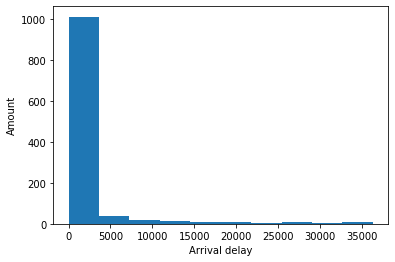

In [48]:
plt.hist(df["ArrDelay"].value_counts().tolist())
plt.xlabel("Arrival delay")
plt.ylabel("Amount")
plt.show() 

    + Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

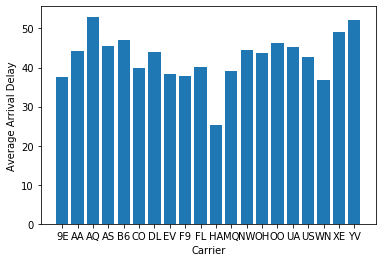

In [65]:
df["sortedCarrier"] = sorted(df['UniqueCarrier'])
md = df.groupby('sortedCarrier').sum()['ArrDelay']/df.groupby('sortedCarrier').count()['ArrDelay']
carrier = sorted(df['UniqueCarrier'].unique())
#print(md)
#print(carrier)
plt.bar(carrier, md)
plt.xlabel("Carrier")
plt.ylabel("Average Arrival Delay")
plt.show()


    + Dues variables numèriques (ArrDelay i DepDelay)

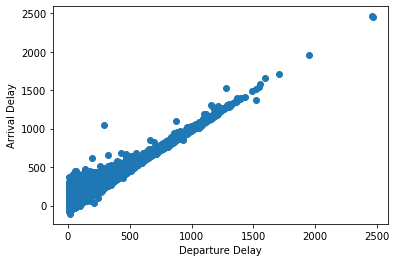

In [45]:
plt.scatter(df['DepDelay'], df['ArrDelay'])
plt.xlabel("Departure Delay")
plt.ylabel("Arrival Delay")
plt.show()


    + Tres variables (ArrDelay, DepDelay i UniqueCarrier)

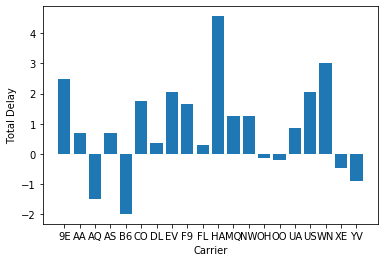

In [64]:
#print("depDelay",df["DepDelay"],"/n")
#print("ArrDelay",df["ArrDelay"])
#print("avDelay: ",(df["DepDelay"]+df["ArrDelay"])/2)
df["sortedCarrier"] = sorted(df['UniqueCarrier'])
td = df.groupby('sortedCarrier').sum()['DepDelay']-df.groupby('sortedCarrier').sum()['ArrDelay']
md = td/df.groupby('sortedCarrier').count()['UniqueCarrier']
carrier = sorted(df['UniqueCarrier'].unique())
plt.bar(carrier, md)
plt.xlabel("Carrier")
plt.ylabel("Total Delay")
plt.show()



    + Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [70]:
print("depDelay: ","\n",df["DepDelay"],"\n")
print("ArrDelay: ","\n",df["ArrDelay"],"\n")
print("Airtime: ","\n",df["AirTime"])
#print(df.columns.values)

depDelay:  
 0           8.0
1          19.0
2           8.0
4          34.0
5          25.0
           ... 
7009710    30.0
7009717    57.0
7009718    80.0
7009726    11.0
7009727     7.0
Name: DepDelay, Length: 1936758, dtype: float64 

ArrDelay:  
 0         -14.0
1           2.0
2          14.0
4          34.0
5          11.0
           ... 
7009710    25.0
7009717    75.0
7009718    99.0
7009726     9.0
7009727    -5.0
Name: ArrDelay, Length: 1936758, dtype: float64 

Airtime:  
 0          116.0
1          113.0
2           76.0
4           77.0
5           87.0
           ...  
7009710    120.0
7009717     78.0
7009718    122.0
7009726     89.0
7009727    104.0
Name: AirTime, Length: 1936758, dtype: float64
['Year' 'Month' 'DayofMonth' 'DayOfWeek' 'DepTime' 'CRSDepTime' 'ArrTime'
 'CRSArrTime' 'UniqueCarrier' 'FlightNum' 'TailNum' 'ActualElapsedTime'
 'CRSElapsedTime' 'AirTime' 'ArrDelay' 'DepDelay' 'Origin' 'Dest'
 'Distance' 'TaxiIn' 'TaxiOut' 'Cancelled' 'CancellationCode' 'D